In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#function to simulate circuit with rotation gate
def simulate_rotation(gate_name, gate_function, theta):

    qc = QuantumCircuit(1, 1)
    qc.h(0)  
    gate_function(qc, theta)  
    qc.measure(0, 0)

    print(f"Quantum Circuit with {gate_name}({theta:.2f}):")
    fig, ax = plt.subplots()
    qc.draw('mpl', ax=ax)
    display(fig)
    plt.close(fig)

    simulator = AerSimulator(method='automatic')
    result = simulator.run(qc, shots=1024).result()
    counts = result.get_counts(qc)

    print(f"Measurement Results for {gate_name}({theta:.2f}):")
    fig, ax = plt.subplots()
    plot_histogram(counts, ax=ax)
    display(fig)
    plt.close(fig)

    qc_state = QuantumCircuit(1)
    qc_state.h(0)
    gate_function(qc_state, theta)
    qc_state.save_statevector()

    simulator_state = AerSimulator(method='statevector')
    result_state = simulator_state.run(qc_state).result()
    statevector = result_state.get_statevector(qc_state)

    print(f"Bloch Sphere for {gate_name}({theta:.2f}):")
    fig = plot_bloch_multivector(statevector)
    display(fig)
    plt.close()
   

In [5]:
# define angles to test
angles = [0, np.pi/2, np.pi, 3*np.pi/2]
#define rotation gates
rotations = [
    ("Rx", lambda qc, theta: qc.rx(theta, 0)),
    ("Ry", lambda qc, theta: qc.ry(theta, 0)),
    ("Rz", lambda qc, theta: qc.rz(theta, 0))
]


Quantum Circuit with Rx(0.00):


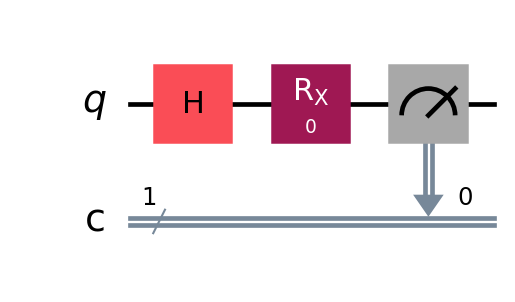

Measurement Results for Rx(0.00):


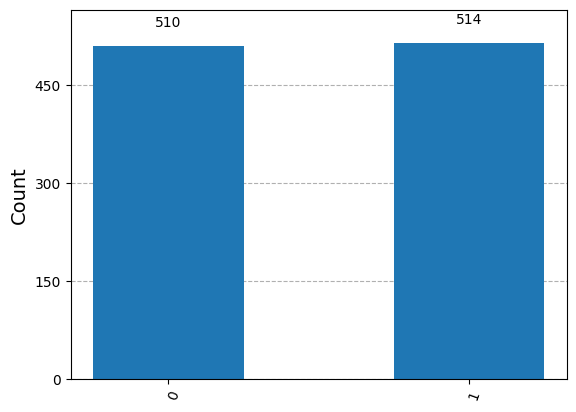

Bloch Sphere for Rx(0.00):


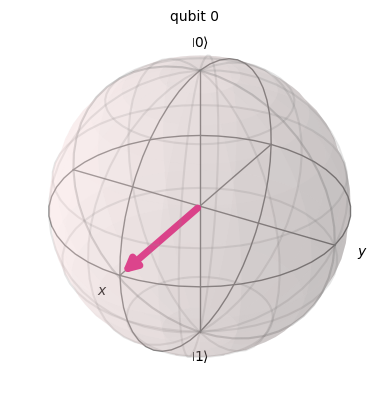

Quantum Circuit with Rx(1.57):


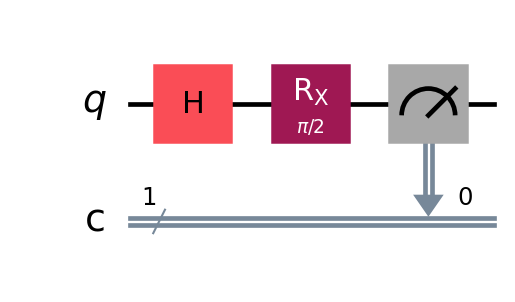

Measurement Results for Rx(1.57):


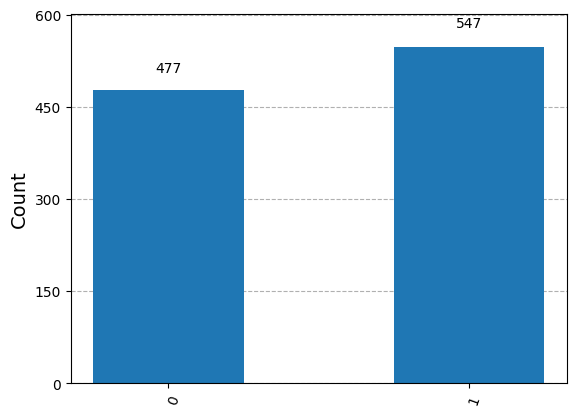

Bloch Sphere for Rx(1.57):


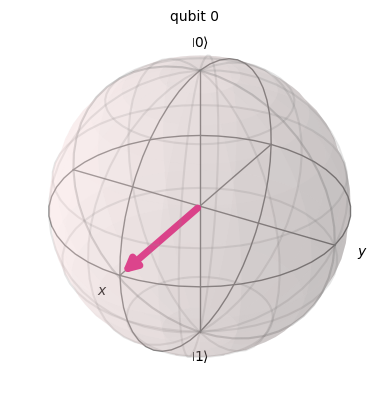

Quantum Circuit with Rx(3.14):


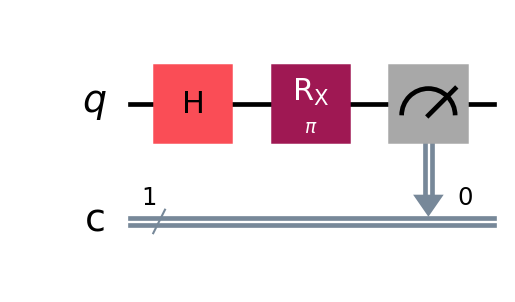

Measurement Results for Rx(3.14):


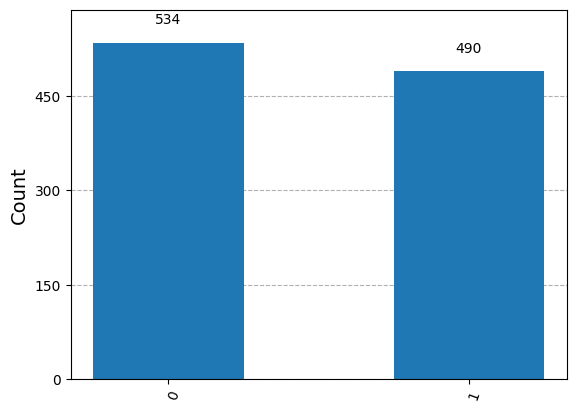

Bloch Sphere for Rx(3.14):


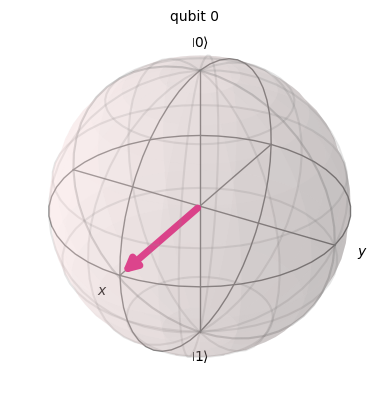

Quantum Circuit with Rx(4.71):


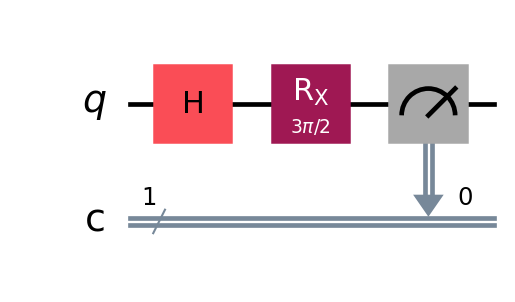

Measurement Results for Rx(4.71):


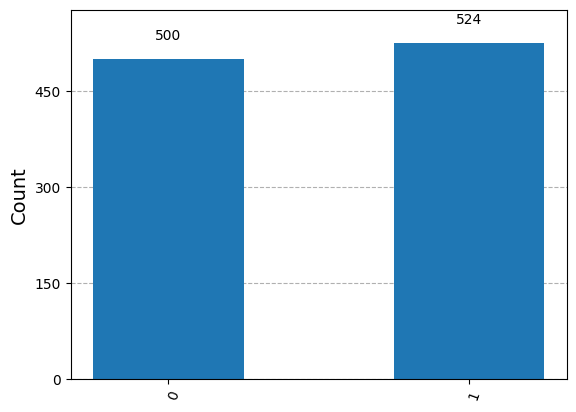

Bloch Sphere for Rx(4.71):


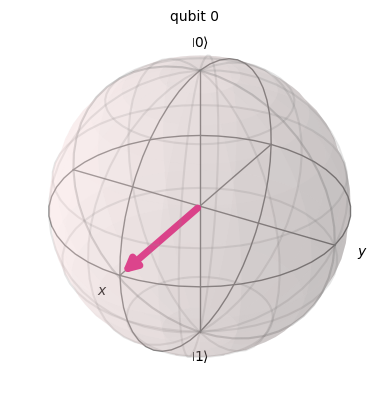

Quantum Circuit with Ry(0.00):


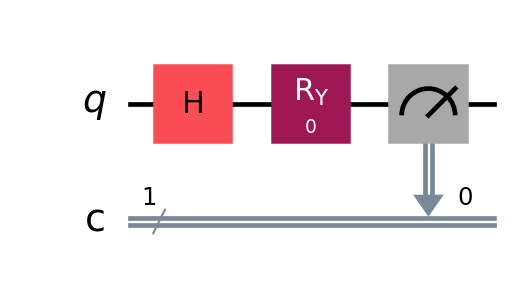

Measurement Results for Ry(0.00):


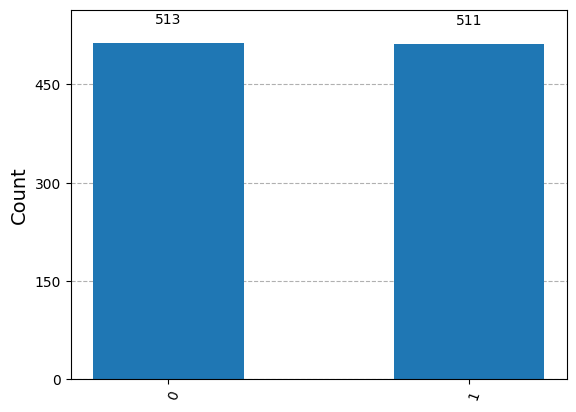

Bloch Sphere for Ry(0.00):


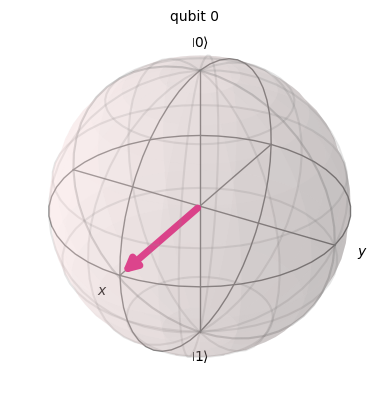

Quantum Circuit with Ry(1.57):


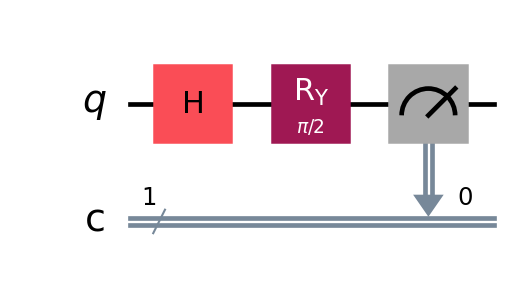

Measurement Results for Ry(1.57):


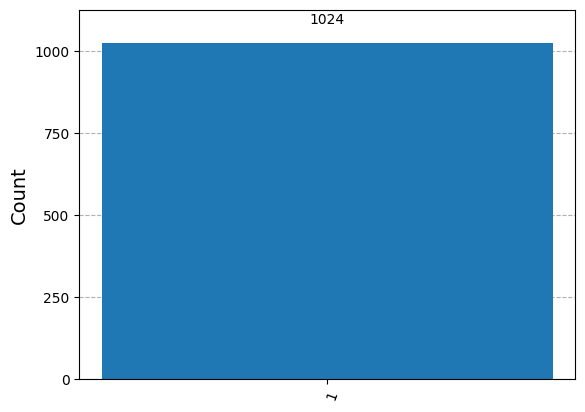

Bloch Sphere for Ry(1.57):


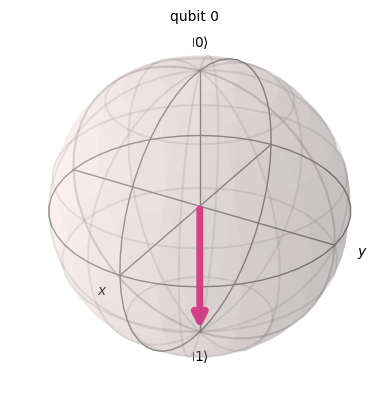

Quantum Circuit with Ry(3.14):


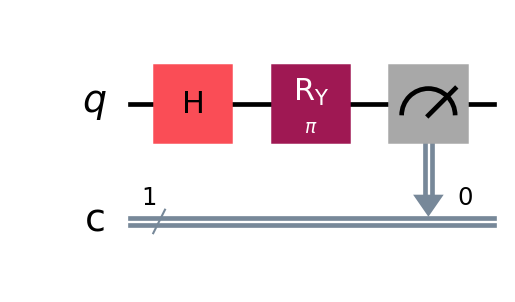

Measurement Results for Ry(3.14):


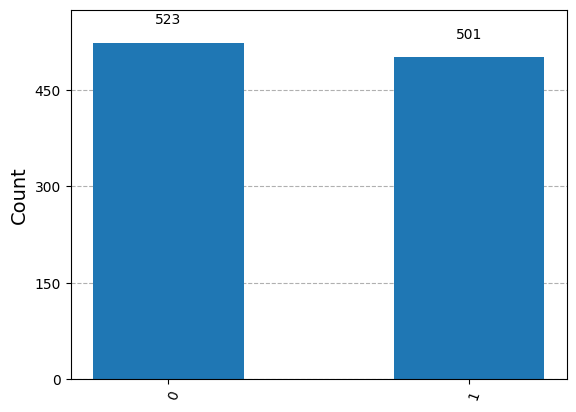

Bloch Sphere for Ry(3.14):


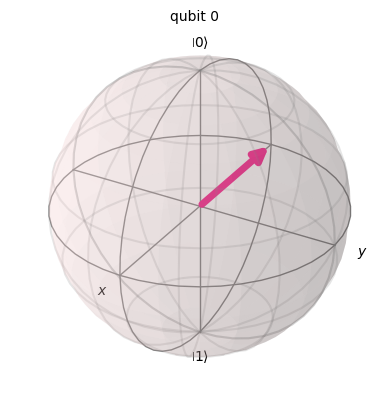

Quantum Circuit with Ry(4.71):


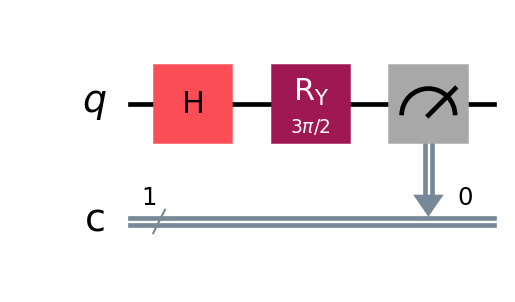

Measurement Results for Ry(4.71):


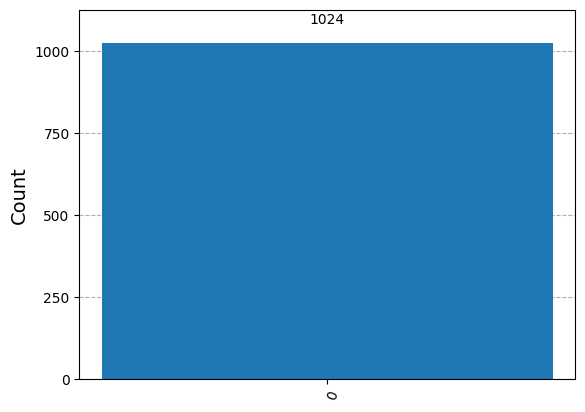

Bloch Sphere for Ry(4.71):


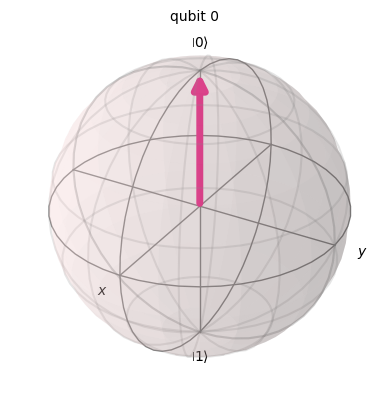

Quantum Circuit with Rz(0.00):


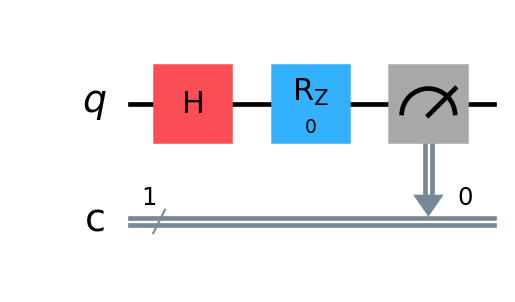

Measurement Results for Rz(0.00):


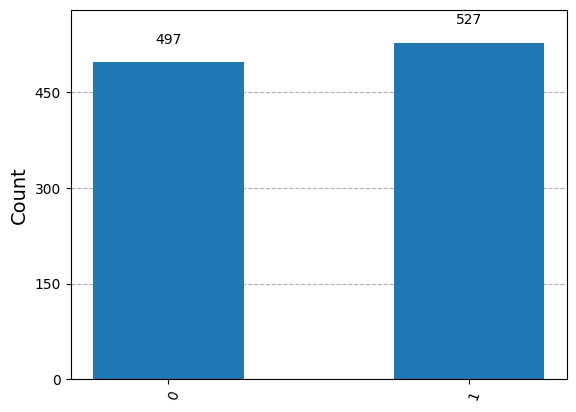

Bloch Sphere for Rz(0.00):


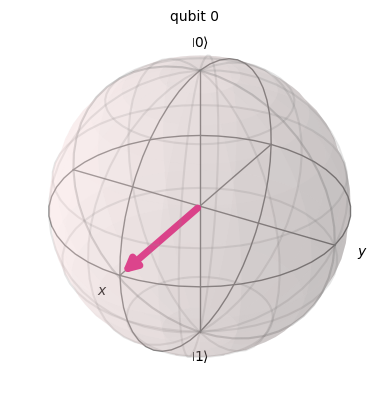

Quantum Circuit with Rz(1.57):


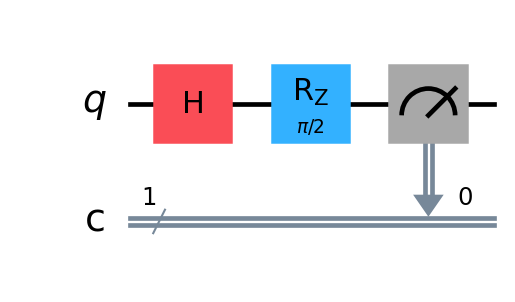

Measurement Results for Rz(1.57):


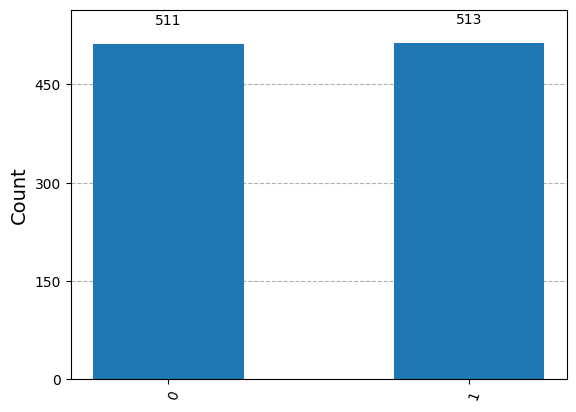

Bloch Sphere for Rz(1.57):


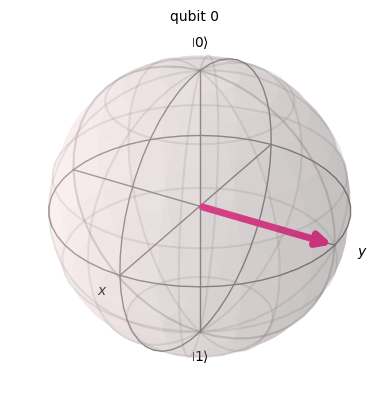

Quantum Circuit with Rz(3.14):


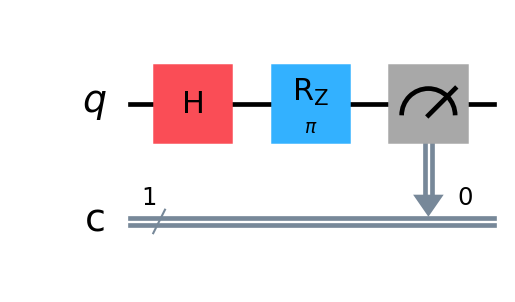

Measurement Results for Rz(3.14):


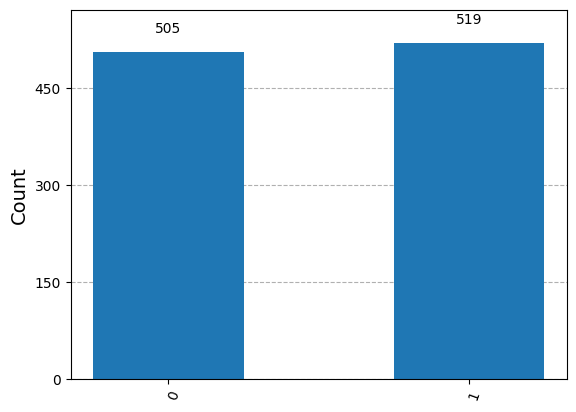

Bloch Sphere for Rz(3.14):


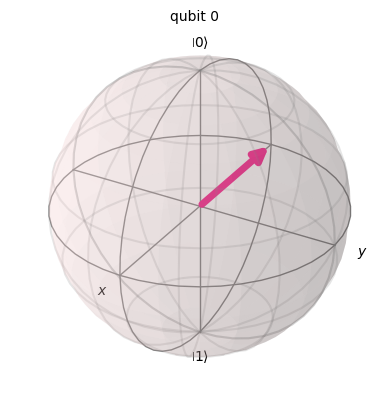

Quantum Circuit with Rz(4.71):


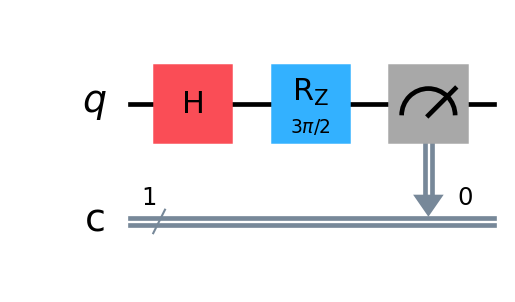

Measurement Results for Rz(4.71):


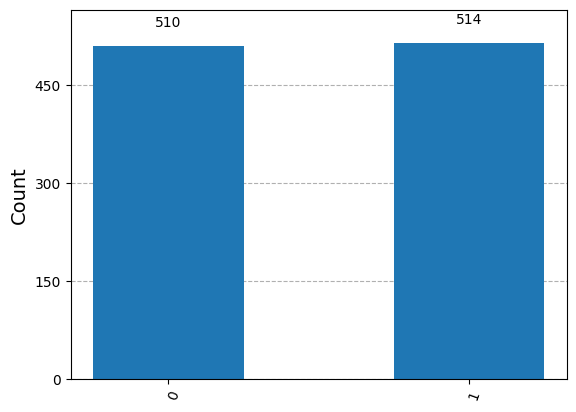

Bloch Sphere for Rz(4.71):


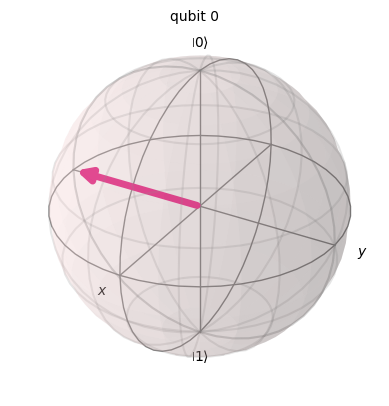

In [7]:
#test rotation gate with different angle
for gate_name, gate_function in rotations:
    for theta in angles:
        simulate_rotation(gate_name, gate_function, theta)